# BANK DATA ANALYSIS

In [211]:
# importing the packages--
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [212]:
# reading the data file--
def read_data():
    data=pd.read_excel(r"D:\Master in Data Science\Python\Projects\Logistic Regresssion_Project7\4. Logistic Regresssion/bank-full.xlsx ")
    return data

In [213]:
# calling the function--
data= read_data()
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [214]:
# copying the data--
data.copy()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [215]:
# data analysis--
data.shape

(45211, 17)

In [216]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [217]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [219]:
# checking the missing values--
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [220]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='job', ylabel='count'>

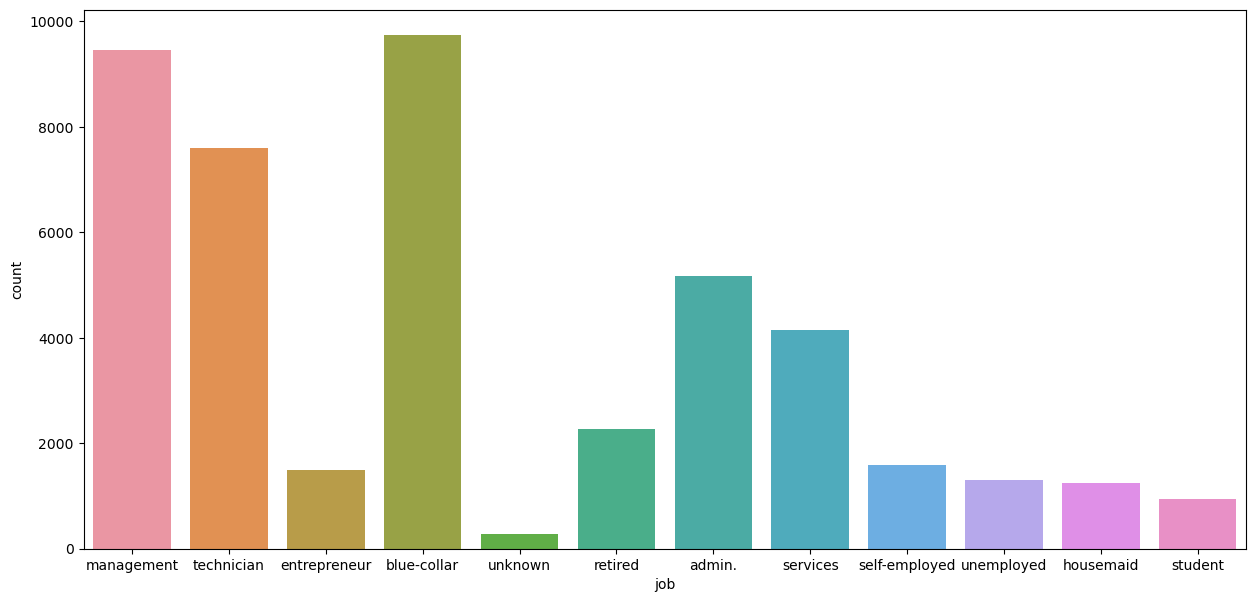

In [221]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['job'])

In [222]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

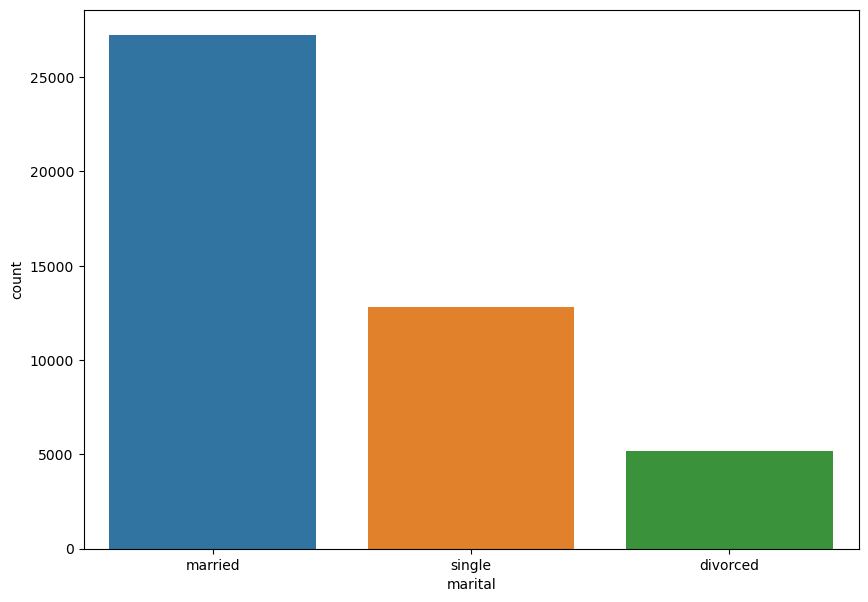

In [223]:
plt.figure(figsize = (10,7))
sns.countplot(x = data['marital'])

In [224]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

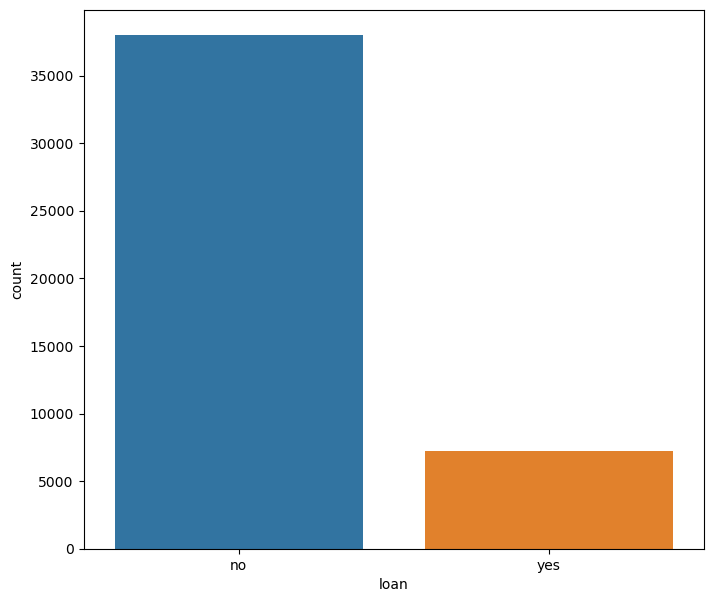

In [225]:
plt.figure(figsize = (8,7))
sns.countplot(x = data['loan'])

In [226]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

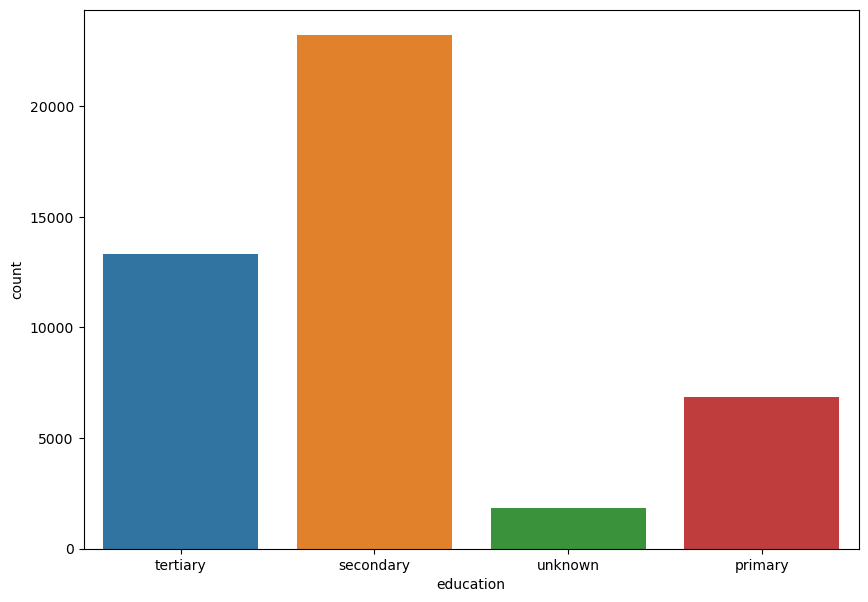

In [227]:
plt.figure(figsize = (10,7))
sns.countplot(x = data['education'])

<Axes: xlabel='age', ylabel='Count'>

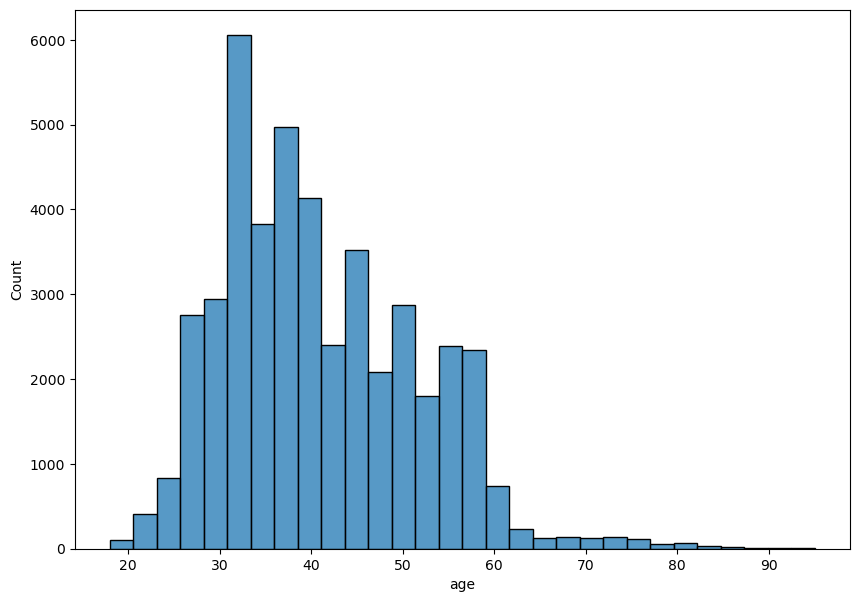

In [228]:
plt.figure(figsize=(10,7))
sns.histplot(x = data['age'],bins = 30)

<Axes: xlabel='balance', ylabel='Count'>

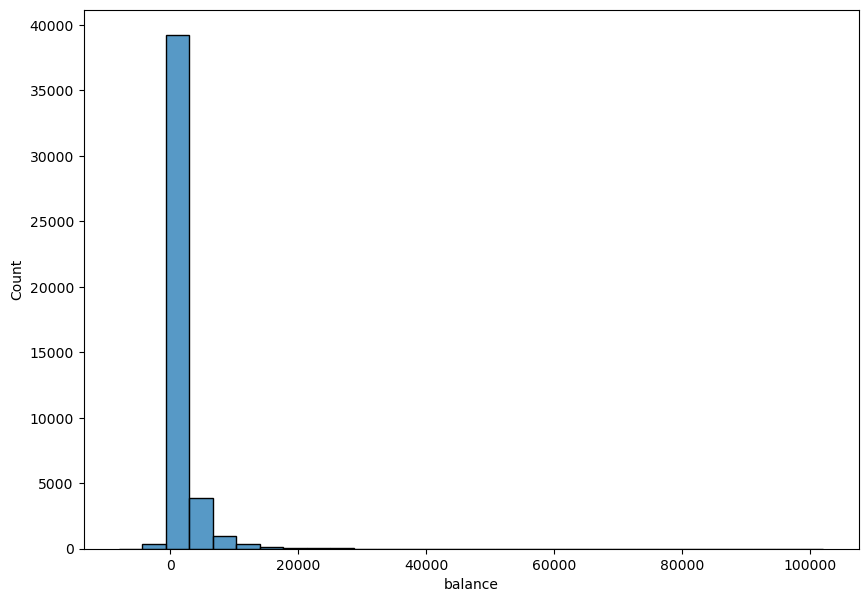

In [229]:
plt.figure(figsize = (10,7))
sns.histplot(x = data['balance'],bins = 30)

<Axes: xlabel='job', ylabel='count'>

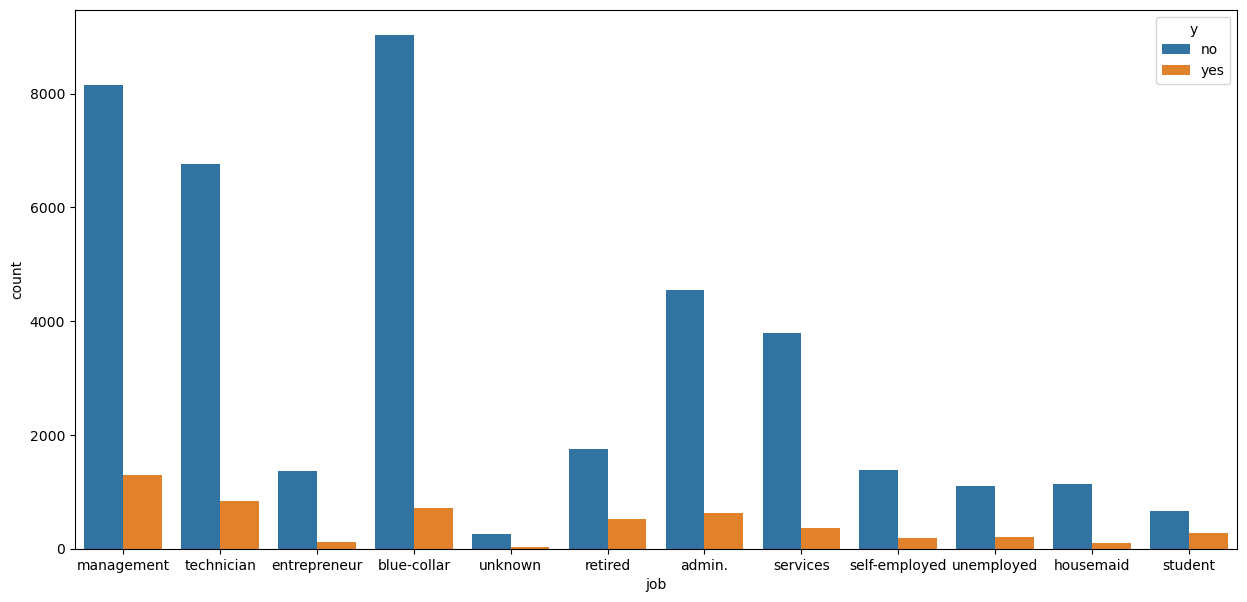

In [230]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['job'],hue = 'y', data  =data)

<Axes: xlabel='marital', ylabel='count'>

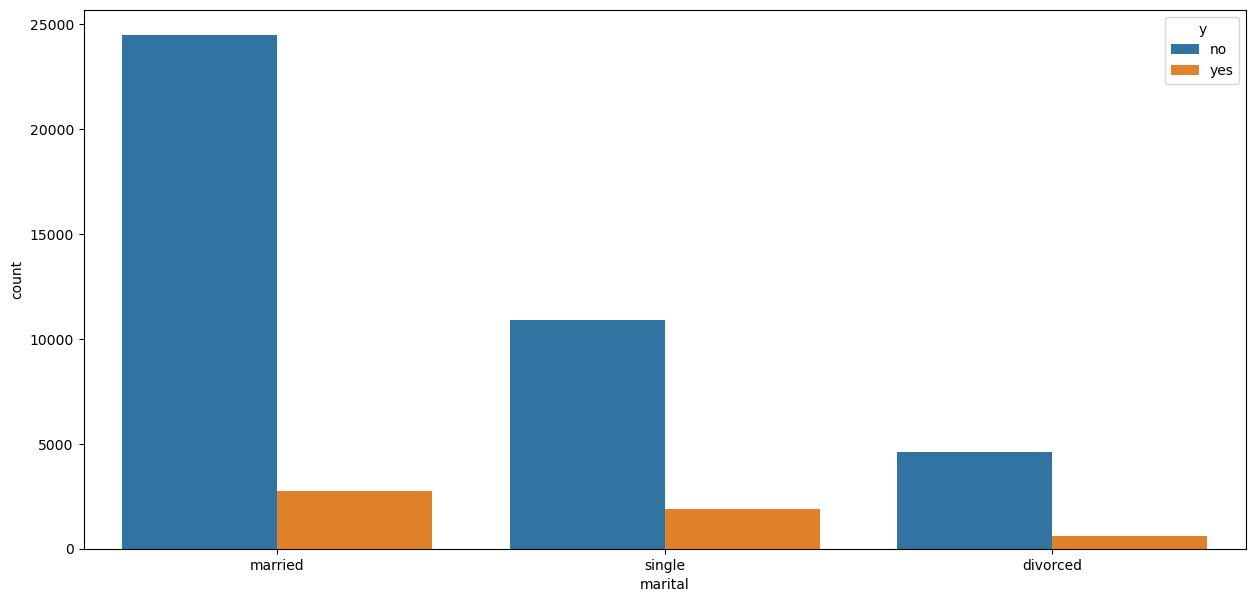

In [231]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['marital'],hue = 'y', data  =data)

In [232]:
# dropping the unwanted columns--
data.drop(['education','contact','day','month','duration','previous'],axis = 1,inplace = True)
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,y
0,58,management,married,no,2143,yes,no,1,-1,unknown,no
1,44,technician,single,no,29,yes,no,1,-1,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,1,-1,unknown,no
3,47,blue-collar,married,no,1506,yes,no,1,-1,unknown,no
4,33,unknown,single,no,1,no,no,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,3,-1,unknown,yes
45207,71,retired,divorced,no,1729,no,no,2,-1,unknown,yes
45208,72,retired,married,no,5715,no,no,5,184,success,yes
45209,57,blue-collar,married,no,668,no,no,4,-1,unknown,no


In [233]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [234]:
dum1 = pd.get_dummies(data['job'])
data = pd.concat([data,dum1],axis = 1)
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,no,2143,yes,no,1,-1,unknown,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,no,29,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,no,2,yes,yes,1,-1,unknown,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,no,1506,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,no,1,no,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,3,-1,unknown,...,0,0,0,0,0,0,0,1,0,0
45207,71,retired,divorced,no,1729,no,no,2,-1,unknown,...,0,0,0,1,0,0,0,0,0,0
45208,72,retired,married,no,5715,no,no,5,184,success,...,0,0,0,1,0,0,0,0,0,0
45209,57,blue-collar,married,no,668,no,no,4,-1,unknown,...,0,0,0,0,0,0,0,0,0,0


In [235]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [236]:
dum2 = pd.get_dummies(data['marital'])
data = pd.concat([data,dum2],axis = 1)
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,management,married,no,2143,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,no,29,yes,no,1,-1,unknown,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,no,2,yes,yes,1,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,no,1506,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,no,1,no,no,1,-1,unknown,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,3,-1,unknown,...,0,0,0,0,1,0,0,0,1,0
45207,71,retired,divorced,no,1729,no,no,2,-1,unknown,...,1,0,0,0,0,0,0,1,0,0
45208,72,retired,married,no,5715,no,no,5,184,success,...,1,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,married,no,668,no,no,4,-1,unknown,...,0,0,0,0,0,0,0,0,1,0


In [237]:
data.drop(['job','marital'],axis = 1 , inplace = True)
data

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,no,2143,yes,no,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
1,44,no,29,yes,no,1,-1,unknown,no,0,...,0,0,0,0,1,0,0,0,0,1
2,33,no,2,yes,yes,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
3,47,no,1506,yes,no,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
4,33,no,1,no,no,1,-1,unknown,no,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,3,-1,unknown,yes,0,...,0,0,0,0,1,0,0,0,1,0
45207,71,no,1729,no,no,2,-1,unknown,yes,0,...,1,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,5,184,success,yes,0,...,1,0,0,0,0,0,0,0,1,0
45209,57,no,668,no,no,4,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0


In [238]:
d = {'yes':1,'no':0}
data['default'] = data['default'].map(d)
d1 = {'yes':1,'no':0}
data['housing'] = data['housing'].map(d1)
d2 = {'yes':1,'no':0}
data['loan'] = data['loan'].map(d2)
data

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,0,2143,1,0,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,1,-1,unknown,no,0,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,1,-1,unknown,no,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,3,-1,unknown,yes,0,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,2,-1,unknown,yes,0,...,1,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,5,184,success,yes,0,...,1,0,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,4,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0


In [239]:
dum3 = pd.get_dummies(data['poutcome'])
data = pd.concat([data,dum3],axis =1)

In [240]:
data.drop(['poutcome'],axis = 1 ,inplace = True)

In [241]:
d = {'yes':1,'no':0}
data['y'] = data['y'].map(d)
data

,age,default,balance,housing,loan,campaign,pdays,y,admin.,blue-collar,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,0,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,1,-1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,1,-1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,1,-1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,3,-1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,2,-1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,5,184,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,4,-1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [242]:
# saving the data in X and y variables--
X = data.drop(['y'],axis =1)
y = data['y']

In [243]:
st = StandardScaler()

In [244]:
X_transform = st.fit_transform(X)

In [245]:
X_data = pd.DataFrame(X_transform,columns = X.columns)
X_data

,age,default,balance,housing,loan,campaign,pdays,admin.,blue-collar,entrepreneur,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,1.606965,-0.13549,0.256419,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,-0.449414,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.13549,-0.437895,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,2.225121,-0.172266,-0.080069,-0.360780,-1.229691,1.592128,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.13549,-0.446762,0.893915,2.289359,-0.569351,-0.411453,-0.359369,-0.523740,5.422561,...,-0.449414,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,-0.13549,0.047205,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,1.909346,-0.184415,...,-0.449414,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.13549,-0.447091,-1.118674,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,-0.449414,-0.172266,12.489301,-0.360780,-1.229691,1.592128,-0.348687,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.13549,-0.176460,-1.118674,-0.436803,0.076230,-0.411453,-0.359369,-0.523740,-0.184415,...,2.225121,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519
45207,2.831227,-0.13549,0.120447,-1.118674,-0.436803,-0.246560,-0.411453,-0.359369,-0.523740,-0.184415,...,-0.449414,-0.172266,-0.080069,2.771775,-1.229691,-0.628090,-0.348687,-0.205972,-0.185948,0.472519
45208,2.925401,-0.13549,1.429593,-1.118674,-0.436803,0.721811,1.436189,-0.359369,-0.523740,-0.184415,...,-0.449414,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,5.377848,-2.116316
45209,1.512791,-0.13549,-0.228024,-1.118674,-0.436803,0.399020,-0.411453,-0.359369,1.909346,-0.184415,...,-0.449414,-0.172266,-0.080069,-0.360780,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519


# Logistic Regression

In [246]:
# sampling of data--
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size = 0.20,random_state=1234)

In [247]:
log = LogisticRegression()

In [248]:
model_log_train = log.fit(X_train,y_train)
print("Model Training Completed")

Model Training Completed


In [249]:
y_pred1 = model_log_train.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [250]:
log_ac1 = accuracy_score(y_test,y_pred1)*100
print("The Accuracy Score is",log_ac1,"%")
log_pc1 = precision_score(y_test,y_pred1)*100
print("The Precision Score is",log_pc1,"%")
log_rs1 = recall_score(y_test,y_pred1)*100
print("The Recall Score is",log_rs1,"%")
log_fs1 =  f1_score(y_test,y_pred1)*100
print("The f1 Score is",log_fs1,"%")
log_roc_auc1 = roc_auc_score(y_test,y_pred1)*100
print("The Roc Auc Score is",log_roc_auc1,"%")

The Accuracy Score is 89.30664602454938 %
The Precision Score is 66.26016260162602 %
The Recall Score is 15.56829035339064 %
The f1 Score is 25.212683681361174 %
The Roc Auc Score is 57.26513567194294 %


# Random Forest Classifier

In [251]:
rf = RandomForestClassifier()

In [252]:
rf_train = rf.fit(X_train,y_train)
print("Model Training Completed")

Model Training Completed


In [253]:
y_pred2 = rf_train.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [254]:
log_ac2 = accuracy_score(y_test,y_pred2)*100
print("The Accuracy Score is",log_ac2,"%")
log_pc2 = precision_score(y_test,y_pred2)*100
print("The Precision Score is",log_pc2,"%")
log_rs2 = recall_score(y_test,y_pred2)*100
print("The Recall Score is",log_rs2,"%")
log_fs2 =  f1_score(y_test,y_pred2)*100
print("The f1 Score is",log_fs2,"%")
log_roc_auc2 = roc_auc_score(y_test,y_pred2)*100
print("The Roc Auc Score is",log_roc_auc2,"%")

The Accuracy Score is 88.18976003538648 %
The Precision Score is 47.69230769230769 %
The Recall Score is 20.72588347659981 %
The f1 Score is 28.894806924101204 %
The Roc Auc Score is 58.87469761623887 %


# Gradient Boosting

In [255]:
gbc = GradientBoostingClassifier()

In [256]:
gbc_train = gbc.fit(X_train,y_train)
print("Model Training Completed")

Model Training Completed


In [257]:
y_pred3 = gbc_train.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [258]:
log_ac3 = accuracy_score(y_test,y_pred3)*100
print("The Accuracy Score is",log_ac3,"%")
log_pc3 = precision_score(y_test,y_pred3)*100
print("The Precision Score is",log_pc3,"%")
log_rs3 = recall_score(y_test,y_pred3)*100
print("The Recall Score is",log_rs3,"%")
log_fs3 =  f1_score(y_test,y_pred3)*100
print("The f1 Score is",log_fs3,"%")
log_roc_auc3 = roc_auc_score(y_test,y_pred3)*100
print("The Roc Auc Score is",log_roc_auc3,"%")

The Accuracy Score is 89.39511224151278 %
The Precision Score is 66.2962962962963 %
The Recall Score is 17.096466093600764 %
The f1 Score is 27.182991647684133 %
The Roc Auc Score is 57.979198529541755 %


In [259]:
final_data = pd.DataFrame({'Model':['LR','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100
                   ]})

In [260]:
final_data

,Model,ACC
0,LR,89.306646
1,RF,88.189760
2,GBC,89.395112


<Axes: xlabel='Model', ylabel='ACC'>

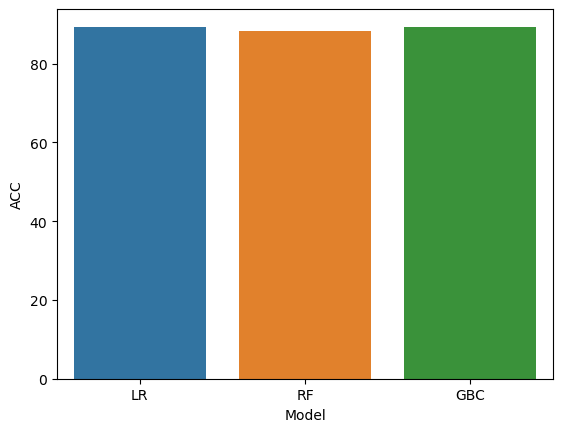

In [261]:
sns.barplot( x = final_data['Model'],y = final_data['ACC'])